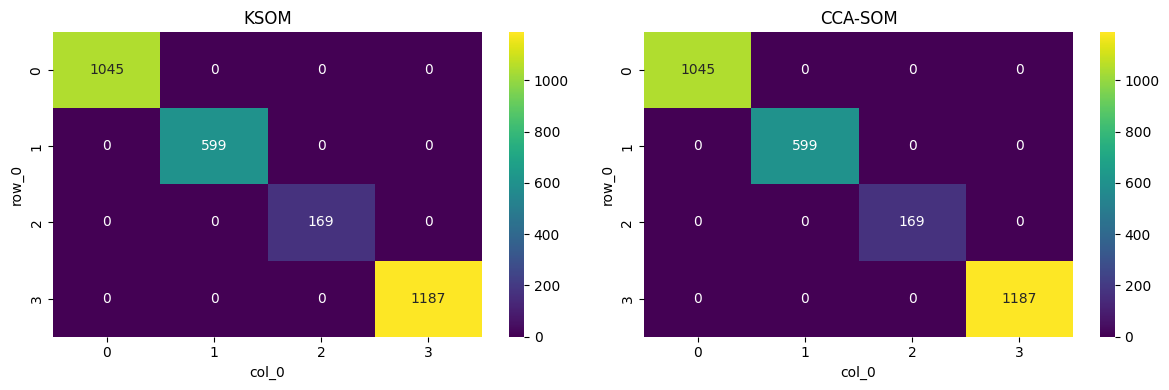

In [ ]:
# 1. Implement any two different distance metric for Self Organizing Maps
# a) Euclidean Distance (KSOM)
# b) Canonical correlation analysis (CCA- SOM)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

# Load the dataset
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Select relevant features (you can adjust this based on your needs)
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_income', 'median_house_value']
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Self Organizing Maps (SOM) with different distance metrics

# a) Euclidean Distance (KSOM)
def euclidean_distance(x, y):
  return np.linalg.norm(x - y)

# Implement your SOM algorithm using the euclidean_distance function.
# (You would need to define your SOM training process here)
# For this example, we'll assume a basic SOM implementation and generate a heatmap based on cluster labels
# obtained using K-means clustering after SOM training (replace with your actual SOM implementation)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
labels_ksom = kmeans.fit_predict(X_scaled)

# b) CCA-SOM (using Canonical Correlation Analysis)
def cca_distance(x, y):
  # Perform CCA on x and y
  cca = CCA(n_components=1)
  cca.fit(x.reshape(1, -1), y.reshape(1, -1))
  x_cca, y_cca = cca.transform(x.reshape(1, -1), y.reshape(1, -1))
  # Calculate the distance based on the CCA components
  return np.linalg.norm(x_cca - y_cca)

# Implement your SOM algorithm using the cca_distance function.
# (Similar to KSOM, assume a basic SOM implementation and use K-means for clustering)
kmeans = KMeans(n_clusters=4, random_state=0)
labels_ccasom = kmeans.fit_predict(X_scaled)


# Visualize the results using heatmaps
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(pd.crosstab(labels_ksom, labels_ksom), annot=True, cmap='viridis', fmt='d')
plt.title('KSOM')

plt.subplot(1, 2, 2)
sns.heatmap(pd.crosstab(lab els_ccasom, labels_ccasom), annot=True, cmap='viridis', fmt='d')
plt.title('CCA-SOM')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

# Load the dataset
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Select relevant features
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_income', 'median_house_value']
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define different distance metrics
def manhattan_distance(x, y):
  return np.sum(np.abs(x - y))

def cosine_distance(x, y):
  return 1 - np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))


# Apply DBSCAN with different distance metrics
dbscan_euclidean = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
labels_euclidean = dbscan_euclidean.fit_predict(X_scaled)

dbscan_manhattan = DBSCAN(eps=0.5, min_samples=5, metric=manhattan_distance)
labels_manhattan = dbscan_manhattan.fit_predict(X_scaled)

dbscan_cosine = DBSCAN(eps=0.5, min_samples=5, metric=cosine_distance)
labels_cosine = dbscan_cosine.fit_predict(X_scaled)

# You can further analyze and visualize the results with different metrics.
# For example, you can print the number of clusters found by each method:
print("Number of clusters found with Euclidean distance:", len(set(labels_euclidean)) - (1 if -1 in labels_euclidean else 0))
print("Number of clusters found with Manhattan distance:", len(set(labels_manhattan)) - (1 if -1 in labels_manhattan else 0))
print("Number of clusters found with Cosine distance:", len(set(labels_cosine)) - (1 if -1 in labels_cosine else 0))




Number of clusters found with Euclidean distance: 14
Number of clusters found with Manhattan distance: 40
Number of clusters found with Cosine distance: 1


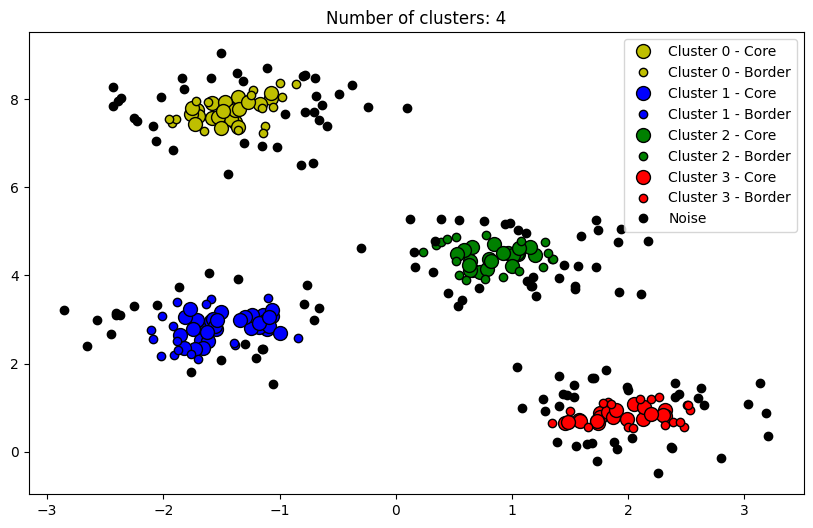

Noise points:
 [[ 1.03992529  1.92991009]
 [ 1.12538917  4.96698028]
 [ 1.4020041   1.726729  ]
 [ 3.20722587  0.36765575]
 [-1.76133611  1.81716162]
 [-0.37881944  8.33265721]
 [-0.80062564  8.52294205]
 [-2.43304923  8.26748617]
 [-2.06457304  7.05157615]
 [ 1.55515985  0.12527811]
 [-1.15330985  2.32340978]
 [ 2.60509732  1.22529553]
 [-0.30022483  4.63059663]
 [-2.65468613  2.40662884]
 [ 0.31831637  4.07299503]
 [-0.63582049  7.86788807]
 [ 1.72330962  4.2012082 ]
 [-1.15072093  6.94467859]
 [-2.22415783  7.50551415]
 [-2.39256579  7.96120222]
 [ 0.72086751  3.71347124]
 [ 0.12313498  5.27917503]
 [ 1.44989606  4.22628228]
 [ 1.99999719  1.40775002]
 [-0.95331586  7.65353061]
 [ 1.8062513   1.86242969]
 [-0.24262743  7.8131623 ]
 [-1.20524678  2.13257056]
 [-2.08886488  7.39097434]
 [-1.49966413  9.04168686]
 [-2.25645909  7.5657327 ]
 [-2.43034268  7.84562711]
 [-0.66054342  3.26013281]
 [-1.50758874  2.08952471]
 [ 1.38813829  0.22430491]
 [ 1.40883907  1.03118909]
 [ 0.94214928

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

# Run DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Identify noise and border points
noise_mask = (labels == -1)
border_mask = ~core_samples_mask & (labels != -1)

# Plotting
plt.figure(figsize=(10, 6))

# Core points: colored by cluster
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Core points
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10, label=f'Cluster {k} - Core')

    # Border points
    xy = X[class_member_mask & border_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6, label=f'Cluster {k} - Border')

# Noise points (colored black)
xy = X[noise_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='k',
         markeredgecolor='k', markersize=6, label='Noise')

plt.title(f'Number of clusters: {n_clusters_}')
plt.legend(loc='best')
plt.show()

# Print out noise and border points
noise_points = X[noise_mask]
border_points = X[border_mask]
print("Noise points:\n", noise_points)
print("\nBorder points:\n", border_points)
print("Core points:\n", core_points)

In [ ]:
print("Core points:\n", core_points)


Core points:
 [[-1.38609104  7.48059603]
 [-1.68146124  2.80114893]
 [ 1.19820169  4.47062449]
 [ 1.05374379  4.49286859]
 [-1.14357242  3.09602867]
 [-1.85305081  2.65728761]
 [ 1.7571105   0.87138001]
 [ 0.65834704  4.64200397]
 [-1.57828393  7.92336949]
 [ 1.72906323  0.70218697]
 [-1.67282269  2.53713616]
 [-1.10608838  2.79315297]
 [-1.35673056  8.05815664]
 [-1.54798974  2.77443867]
 [-1.44057849  7.61354197]
 [ 1.75660949  0.7787028 ]
 [-1.18001744  2.83809554]
 [-1.71333403  7.74616547]
 [ 0.63910375  4.31970261]
 [-1.1196441   2.94734506]
 [-1.24325887  2.80654471]
 [ 2.31721303  0.9418747 ]
 [-1.50215652  3.16480065]
 [-1.07236572  8.02507778]
 [-1.59195749  2.96485888]
 [-1.71934392  2.96505806]
 [ 1.15445328  4.65707391]
 [ 2.1262441   0.73799945]
 [-1.07087693  8.14390329]
 [ 0.65910903  4.12241674]
 [ 2.31690585  0.81189049]
 [-1.4219811   7.54482578]
 [ 1.82750127  0.90640324]
 [-1.70925079  2.99623419]
 [-1.23764326  3.09270949]
 [ 1.03972612  4.50478201]
 [ 1.8706766  

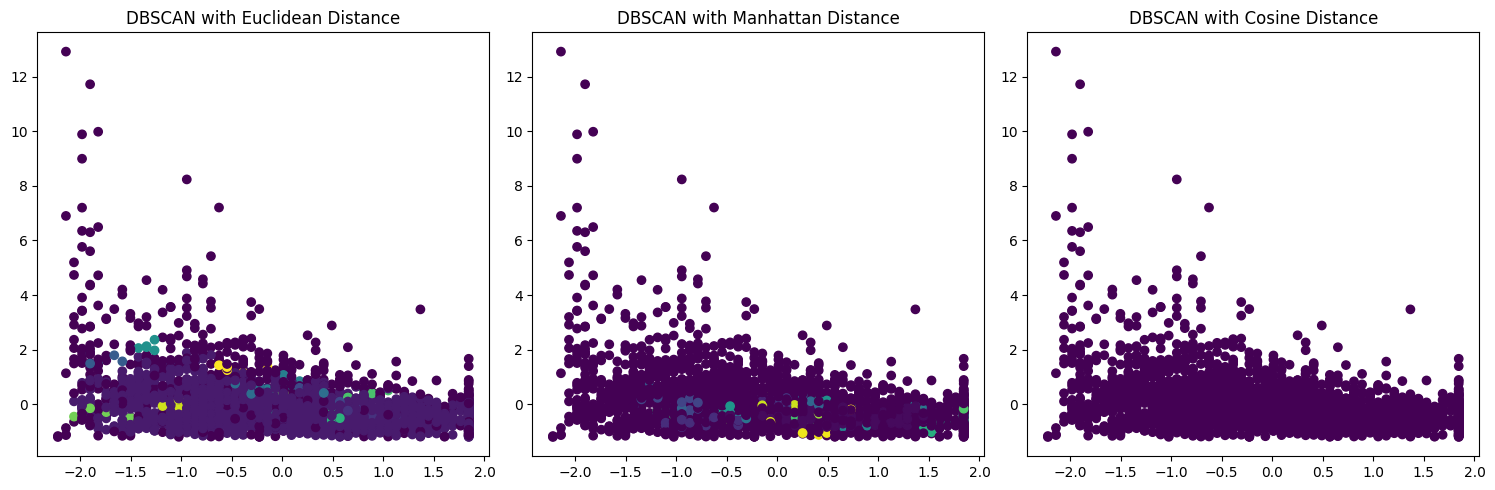

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have X_scaled and labels_euclidean, labels_manhattan, labels_cosine from the previous code

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_euclidean, cmap='viridis')
plt.title('DBSCAN with Euclidean Distance')

plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_manhattan, cmap='viridis')
plt.title('DBSCAN with Manhattan Distance')

plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_cosine, cmap='viridis')
plt.title('DBSCAN with Cosine Distance')

plt.tight_layout()
plt.show()


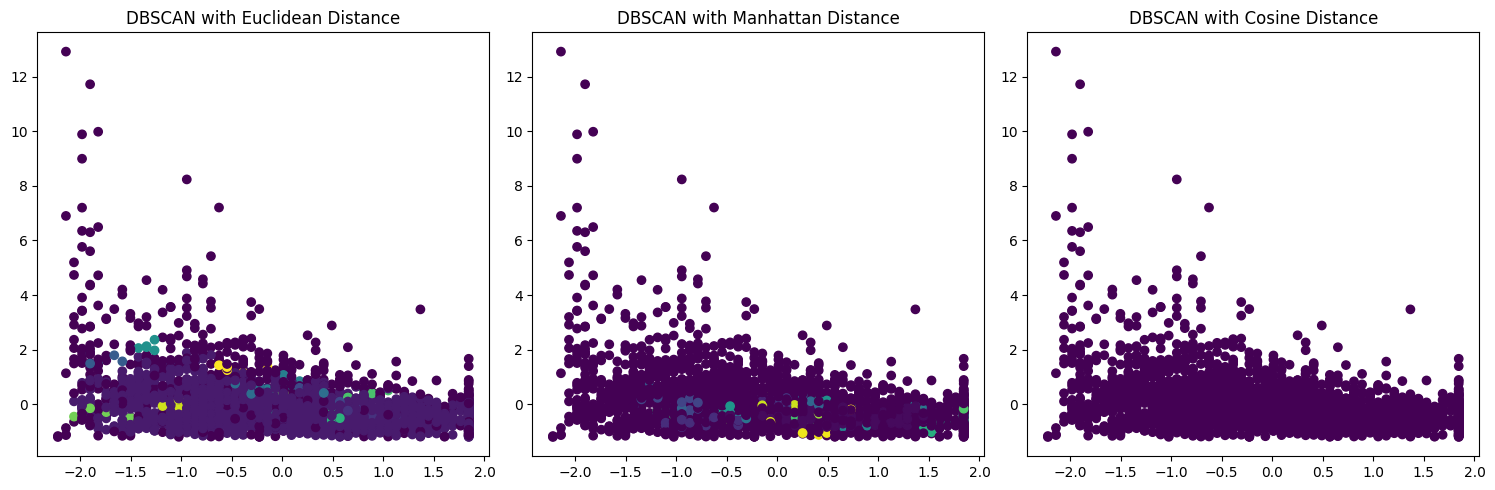

In [ ]:
# prompt: perform Implement DBSCAN by applying different distance metric
# Use /content/sample_data/california_housing_test.csv as dataset
# plot the cluster

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

# Load the dataset
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Select relevant features (you can adjust this based on your needs)
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_income', 'median_house_value']
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define different distance metrics
def manhattan_distance(x, y):
  return np.sum(np.abs(x - y))

def cosine_distance(x, y):
  return 1 - np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

# Apply DBSCAN with different distance metrics
dbscan_euclidean = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
labels_euclidean = dbscan_euclidean.fit_predict(X_scaled)

dbscan_manhattan = DBSCAN(eps=0.5, min_samples=5, metric=manhattan_distance)
labels_manhattan = dbscan_manhattan.fit_predict(X_scaled)

dbscan_cosine = DBSCAN(eps=0.5, min_samples=5, metric=cosine_distance)
labels_cosine = dbscan_cosine.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_euclidean, cmap='viridis')
plt.title('DBSCAN with Euclidean Distance')

plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_manhattan, cmap='viridis')
plt.title('DBSCAN with Manhattan Distance')

plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_cosine, cmap='viridis')
plt.title('DBSCAN with Cosine Distance')

plt.tight_layout()
plt.show()
